In [1]:
import pandas as pnds
import seaborn as sbrn
import matplotlib.pyplot as pplt

In [2]:
data_set = pnds.concat([pnds.read_csv(f'dds_ch2_nyt/nyt{i}.csv') for i in range(1, 32)], ignore_index=True)

In [3]:
data_set

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
14905860,41,1,4,0,1
14905861,0,0,5,0,0
14905862,22,1,3,0,1
14905863,59,0,5,1,1


Створимо нову змінну age_group, яка агрегує користувачів як <18, 18–24, 25–34, 35–44, 45–54, 55–64 та 65+.

In [4]:
bins = [0, 18, 25, 35, 45, 55, 65, data_set['Age'].max()]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_set['age_group'] = pnds.cut(data_set['Age'], bins=bins, labels=labels)

Знайдемо CTR для кожного користувача

In [5]:
data_set['CTR'] = data_set['Clicks'] / data_set['Impressions']
data_set

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0
...,...,...,...,...,...,...,...
14905860,41,1,4,0,1,35-44,0.0
14905861,0,0,5,0,0,NaN,0.0
14905862,22,1,3,0,1,18-24,0.0
14905863,59,0,5,1,1,55-64,0.2


Зафіксуємо на діаграмі кількість показів та показник переходів

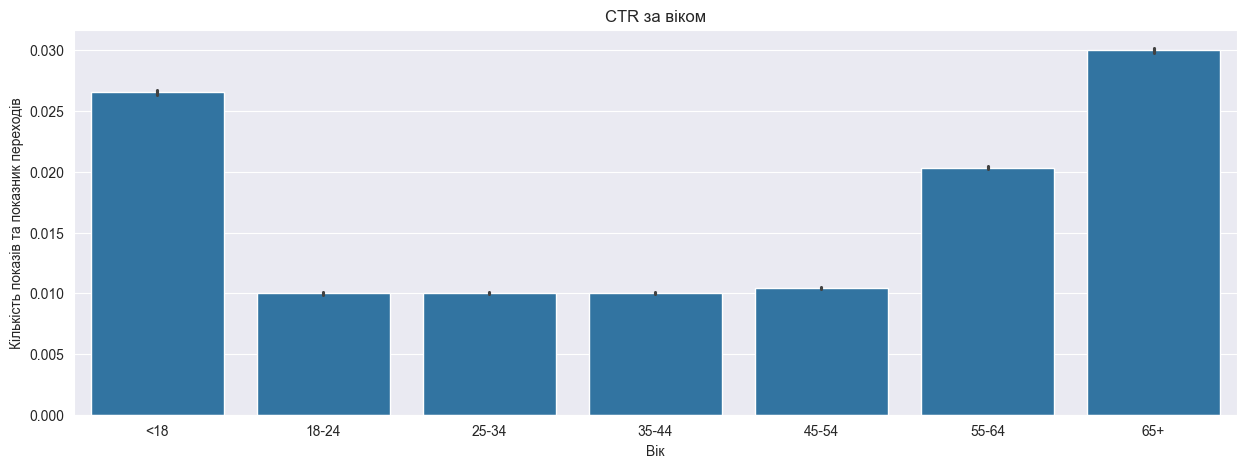

In [6]:
pplt.figure(figsize=(15, 5))
sbrn.barplot(x='age_group', y='CTR', data=data_set)
pplt.title('CTR за віком')
pplt.xlabel('Вік')
pplt.ylabel('Кількість показів та показник переходів')

pplt.show()

Можемо зробити висновок що користувачі молодше 18 та старше 65 частіше переходять за рекламою відносно до кількості показів

Порівняємо кількість показів та показник переходів для авторизованих та неавторизованих користувачів

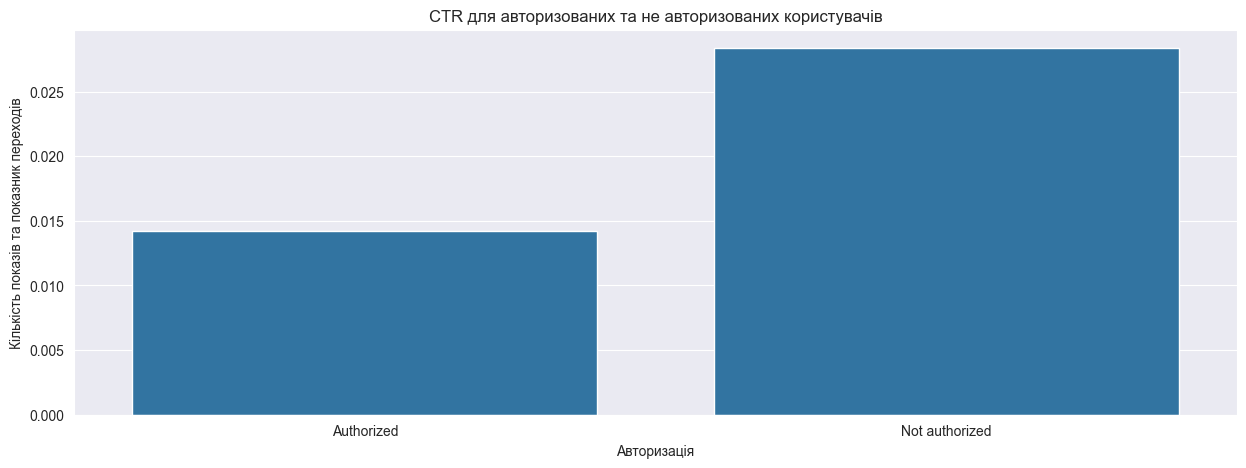

In [7]:
authorized = data_set[data_set['Signed_In'] == 1]
non_authorized = data_set[data_set['Signed_In'] == 0]

pplt.figure(figsize=(15, 5))
sbrn.barplot(x=['Authorized', 'Not authorized'], y=[authorized['CTR'].mean(), non_authorized['CTR'].mean()])
pplt.title('CTR для авторизованих та не авторизованих користувачів')
pplt.xlabel('Авторизація')
pplt.ylabel('Кількість показів та показник переходів')

pplt.show()

Можемо зробити висновок, що неавторизовані користувачі частіше переходять по посиланням

Знайдемо середнє значення переходів за посиланням за віковими категоріями

In [8]:
avg_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].mean()
avg_clicks_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/4119740305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].mean()


age_group
<18      0.133168
18-24    0.049990
25-34    0.050101
35-44    0.050035
45-54    0.052157
55-64    0.101410
65+      0.150174
Name: Clicks, dtype: float64

Знайдемо середнє значення кількості показів за віковими групами

In [9]:
avg_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].mean()
avg_impressions_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/827934986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].mean()


age_group
<18      5.006339
18-24    4.999208
25-34    4.996663
35-44    4.997689
45-54    4.997300
55-64    4.997511
65+      5.002381
Name: Impressions, dtype: float64

Знайдемо медіану за переходами за посиланням залежно від вікової групи

In [10]:
median_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].median()
median_clicks_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/126107936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].median()


age_group
<18      0.0
18-24    0.0
25-34    0.0
35-44    0.0
45-54    0.0
55-64    0.0
65+      0.0
Name: Clicks, dtype: float64

Знайдемо медіану за показами реклами залежно від вікової групи

In [11]:
median_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].median()
median_impressions_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/3270396849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].median()


age_group
<18      5.0
18-24    5.0
25-34    5.0
35-44    5.0
45-54    5.0
55-64    5.0
65+      5.0
Name: Impressions, dtype: float64

Знайдемо значення дисперсії за переходами за посиланням залежно від вікової групи

In [12]:
var_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].var()
var_clicks_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/3346164272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  var_clicks_by_age_group = data_set.groupby('age_group')['Clicks'].var()


age_group
<18      0.134620
18-24    0.050120
25-34    0.050079
35-44    0.049971
45-54    0.052357
55-64    0.101456
65+      0.149828
Name: Clicks, dtype: float64

Знайдемо значення дисперсії за показами реклами залежно від вікової групи

In [13]:
var_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].var()
var_impressions_by_age_group

/var/folders/6_/lp2cbf691qg7_cwv63m3d5rm0000gn/T/ipykernel_98602/1404977324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  var_impressions_by_age_group = data_set.groupby('age_group')['Impressions'].var()


age_group
<18      5.019357
18-24    5.003437
25-34    4.997274
35-44    4.991887
45-54    4.992517
55-64    4.995185
65+      4.983012
Name: Impressions, dtype: float64

Значення дисперсії подібні до середніх значень, можемо зробити що датафрейм має невелику варіативність

Додамо метрики до результуючого датафрейму

In [14]:
result_data_frame = pnds.concat([avg_clicks_by_age_group, avg_impressions_by_age_group, median_clicks_by_age_group, median_impressions_by_age_group, var_clicks_by_age_group, var_impressions_by_age_group], axis=1)
result_data_frame.columns = ['Avg_Clicks', 'Avg_Impressions', 'Median_Clicks', 'Median_Impressions', 'Var_Clicks', 'Var_Impressions']

result_data_frame

,Avg_Clicks,Avg_Impressions,Median_Clicks,Median_Impressions,Var_Clicks,Var_Impressions
age_group,,,,,,
<18,0.133168,5.006339,0.0,5.0,0.134620,5.019357
18-24,0.049990,4.999208,0.0,5.0,0.050120,5.003437
25-34,0.050101,4.996663,0.0,5.0,0.050079,4.997274
35-44,0.050035,4.997689,0.0,5.0,0.049971,4.991887
45-54,0.052157,4.997300,0.0,5.0,0.052357,4.992517
55-64,0.101410,4.997511,0.0,5.0,0.101456,4.995185
65+,0.150174,5.002381,0.0,5.0,0.149828,4.983012


Висновок

Результати показують, що молодші 18 років та старші 65 років мають вищий CTR, і кількість показів реклами рівномірно розподілена між віковими групами.

Аналіз також вказує, що реклама привертає увагу неавторизованих користувачів частіше, що може свідчити про неефективність політики щодо користувачів. Розрахунки показали стабільність показників в різних вікових групах, зокрема, на кожного авторизованого користувача припадає приблизно 5 показів. Всі дані включено в датафрейм для зручності аналізу.